# CAR PRICE PREDICTION

In [ ]:
#importing the libraries
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.preprocessing import StandardScaler
# for reading and printing
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# for the graph plotting (shows the relationship between the datas)
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# split the data set in to the train and the test data
from sklearn.model_selection import train_test_split 
#plot the graph of the data set
import seaborn as sns  
# transforming the data in to the metrics
from sklearn import metrics  

# Data Processing

In [ ]:
#analysing the dataset
cars = pd.read_csv('CarPrice_Assignment.csv')
cars.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [ ]:
#size of dataset
cars.shape

(205, 26)

In [ ]:
cars.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
#need to filter the data
#removing carname and taking only company name
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

car_ID  symboling  CompanyName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0        rwd          front       88.6  ...         130        mpfi   
1        rwd          front       88.6  ...         130        mpfi   
2        rwd          front       94.5  ...         152        mpfi   
3        fwd          front       99.8  ...         109        mpfi   
4        4wd          front       99.4  ...         136        mpfi   

   boreratio  stroke compressionratio horsepower  peakrpm citympg  highwaympg  \
0       3.47    2.68              9.0        111     5000      21          27   
1       3.47    2.68              9.0        111     5000      21          27   
2       2.68    3.47              9.0        154     5000      19          26   
3       3.19    3.40             10.0        102     5500      24          30   
4       3.19    3.40              8.0        115     5500      18          22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  

[5 rows x 26 columns]

In [ ]:
#get all the company names of the cars
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
#here the company names have error
#replace the incorrect ones with correct ones
cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

#check again
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
#again recheck for duplicates
cars.loc[cars.duplicated()]

Empty DataFrame
Columns: [car_ID, symboling, CompanyName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

[0 rows x 26 columns]

In [ ]:
#analysiing the columns or the properties in the dataset
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
cars.head()


car_ID  symboling  CompanyName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0        rwd          front       88.6  ...         130        mpfi   
1        rwd          front       88.6  ...         130        mpfi   
2        rwd          front       94.5  ...         152        mpfi   
3        fwd          front       99.8  ...         109        mpfi   
4        4wd          front       99.4  ...         136        mpfi   

   boreratio  stroke compressionratio horsepower  peakrpm citympg  highwaympg  \
0       3.47    2.68              9.0        111     5000      21          27   
1       3.47    2.68              9.0        111     5000      21          27   
2       2.68    3.47              9.0        154     5000      19          26   
3       3.19    3.40             10.0        102     5500      24          30   
4       3.19    3.40              8.0        115     5500      18          22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  

[5 rows x 26 columns]

# Data Visualisation

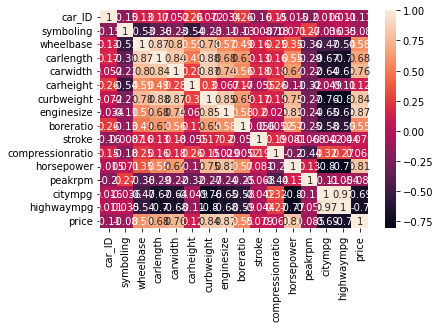

In [ ]:
#heatmap is generally used to show the correalation between diffrent attributes of the dataset
 #annot,If True, write the data value in each cell.
 #corr is used to show the corelations between the columns 
sns.heatmap(cars.corr(),annot=True)

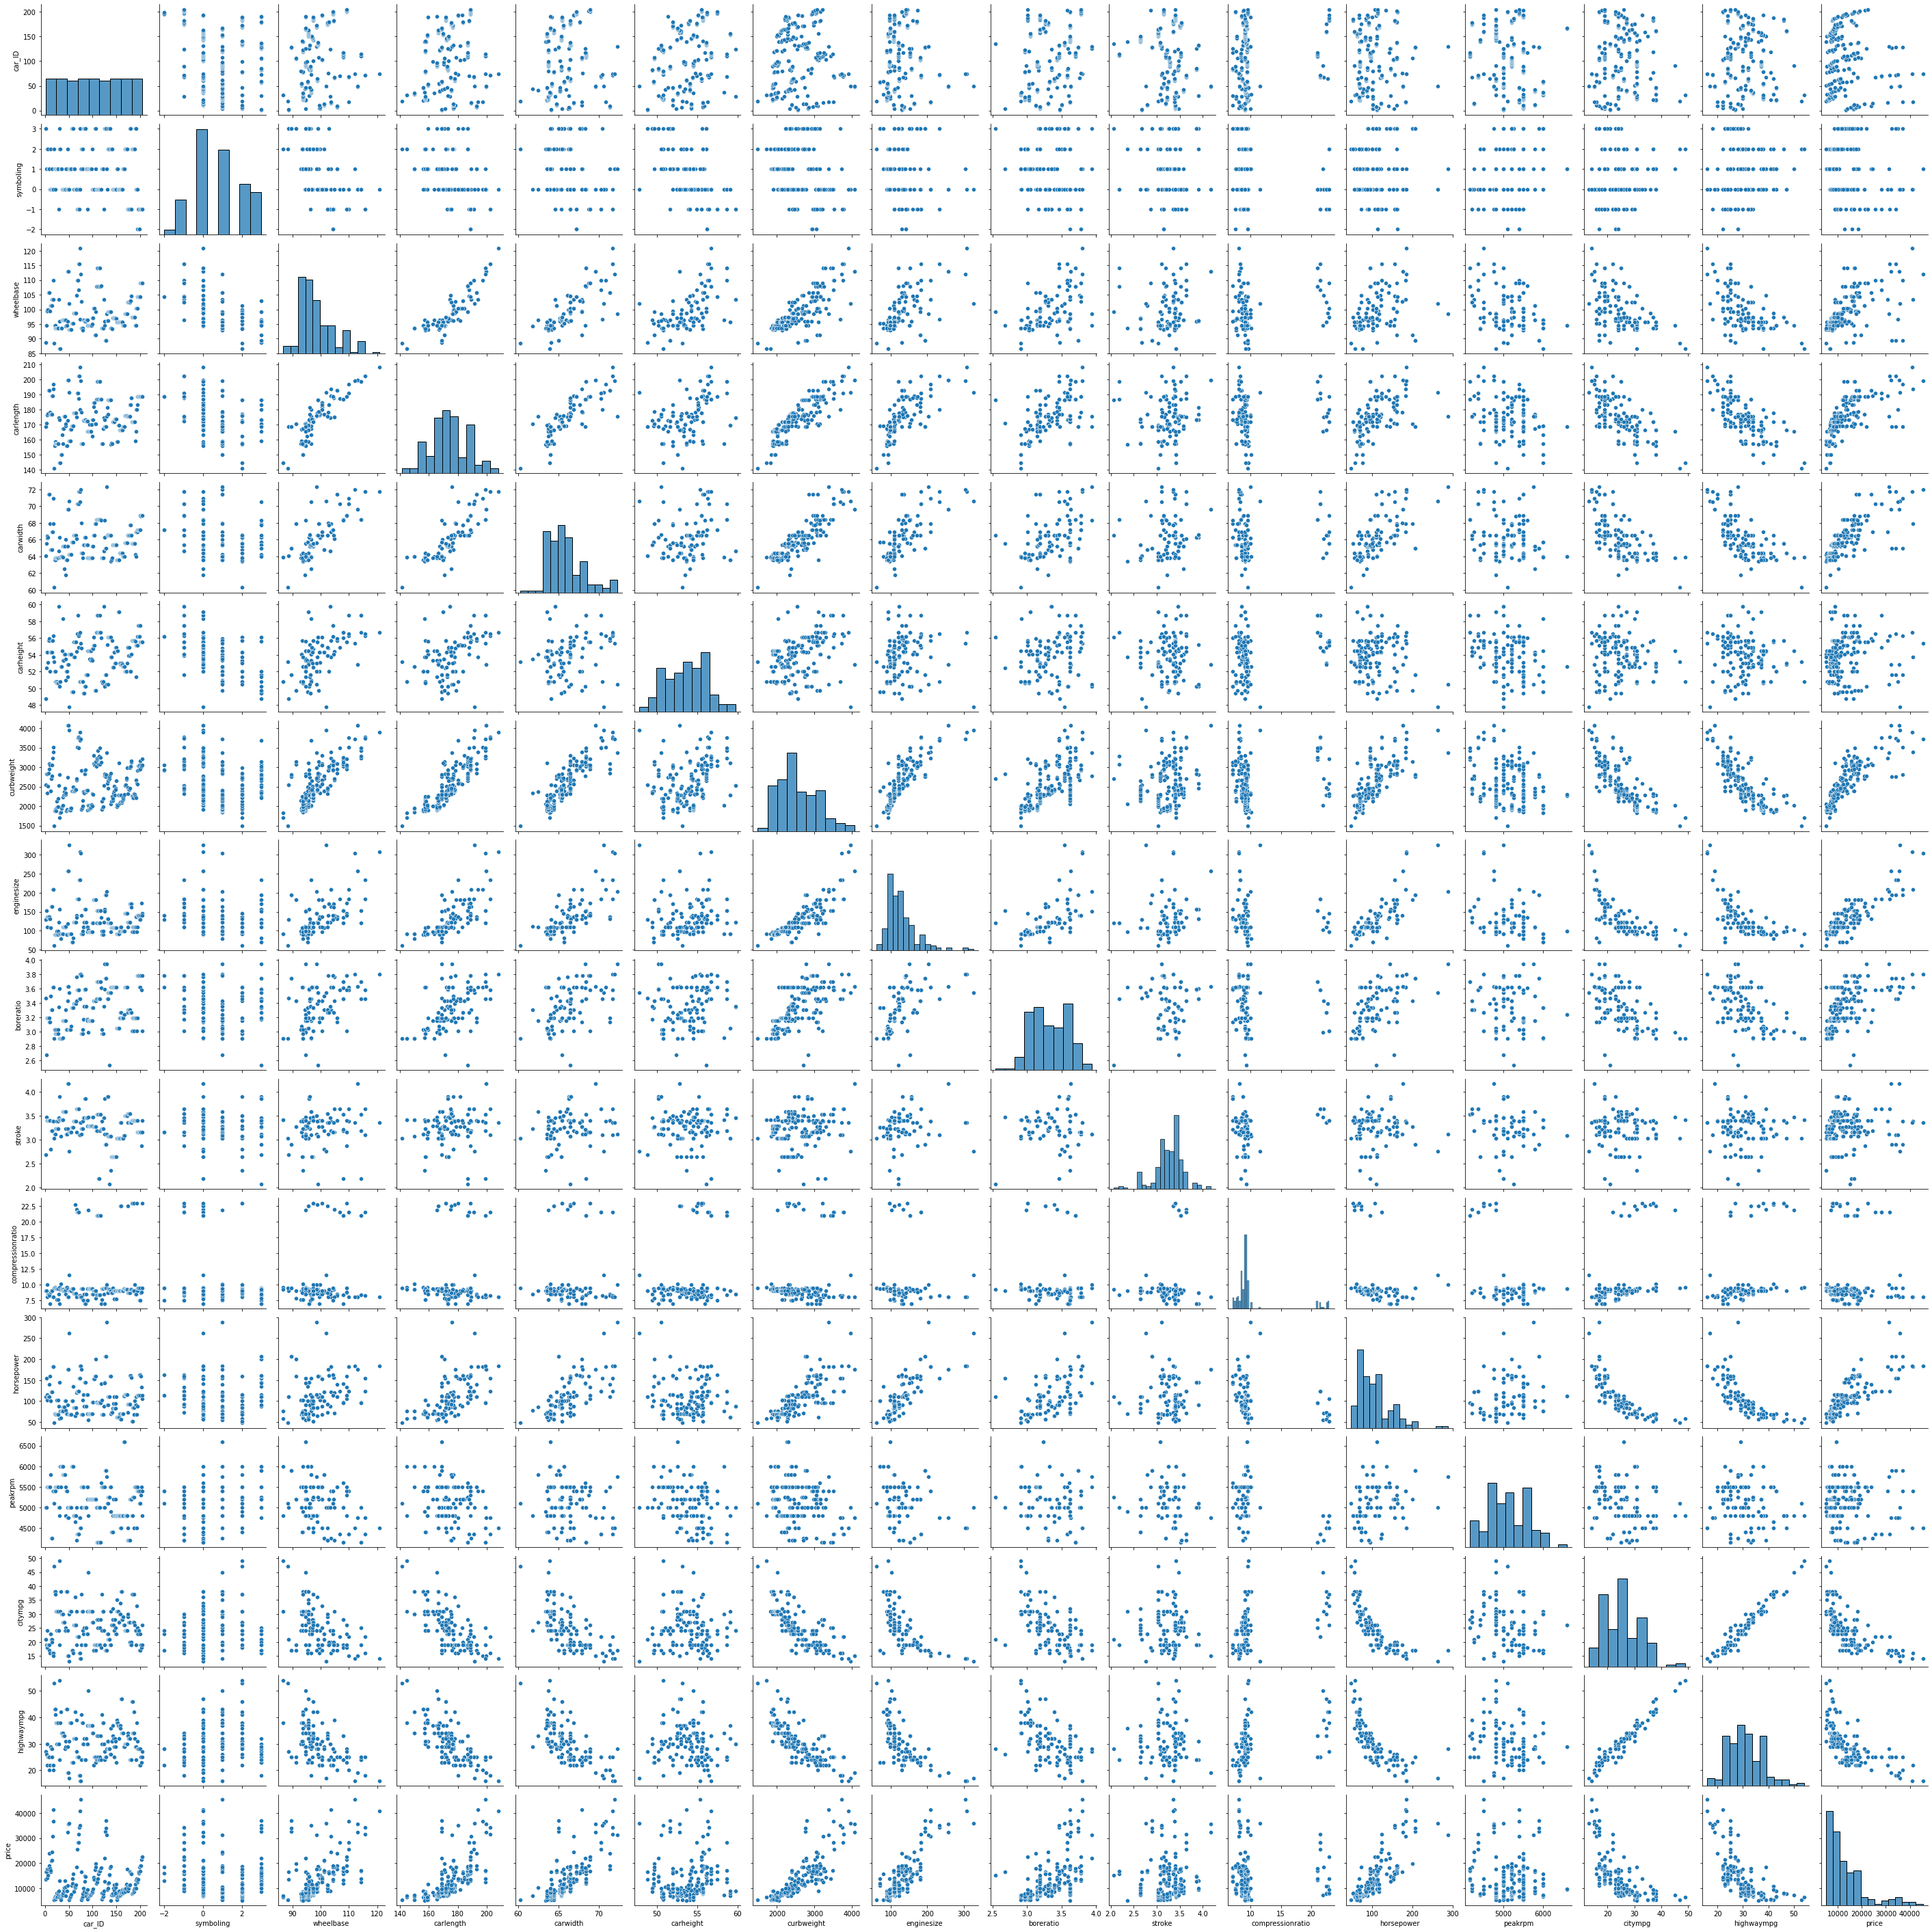

In [ ]:
# plots all the data in the data fied in tha dataset
sns.pairplot(cars) 

In [ ]:
#The Artistname and Genre have the String values so we need to convert them to numerical value 
def encode(data): 
  label_encode = LabelEncoder()
  #label_genre = label_encode.fit_transform()
  label = label_encode.fit_transform(data)
  return label


In [ ]:
#song_data.drop("Genre", axis=1, inplace=True) song_data['Genre'] 'Artist.Name']
 
# Appending the array to our dataFrame
# with column name 'Purchased'
cars["CompanyName"] = encode(cars["CompanyName"])
cars["fueltype"] = encode(cars["fueltype"])
cars["aspiration"] = encode(cars["aspiration"])
cars["doornumber"] = encode(cars["doornumber"])
cars["carbody"] = encode(cars["carbody"])
cars["drivewheel"] = encode(cars["drivewheel"])
cars["enginelocation"] = encode(cars["enginelocation"])
cars["fuelsystem"] = encode(cars["fuelsystem"])
cars["cylindernumber"] = encode(cars["cylindernumber"])
cars["enginetype"] = encode(cars["enginetype"])
# printing Dataframe
cars.head(5)

car_ID  symboling  CompanyName  fueltype  aspiration  doornumber  carbody  \
0       1          3            0         1           0           1        0   
1       2          3            0         1           0           1        0   
2       3          1            0         1           0           1        2   
3       4          2            1         1           0           0        3   
4       5          2            1         1           0           0        3   

   drivewheel  enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0           2               0       88.6  ...         130           5   
1           2               0       88.6  ...         130           5   
2           2               0       94.5  ...         152           5   
3           1               0       99.8  ...         109           5   
4           0               0       99.4  ...         136           5   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

# Data analysis

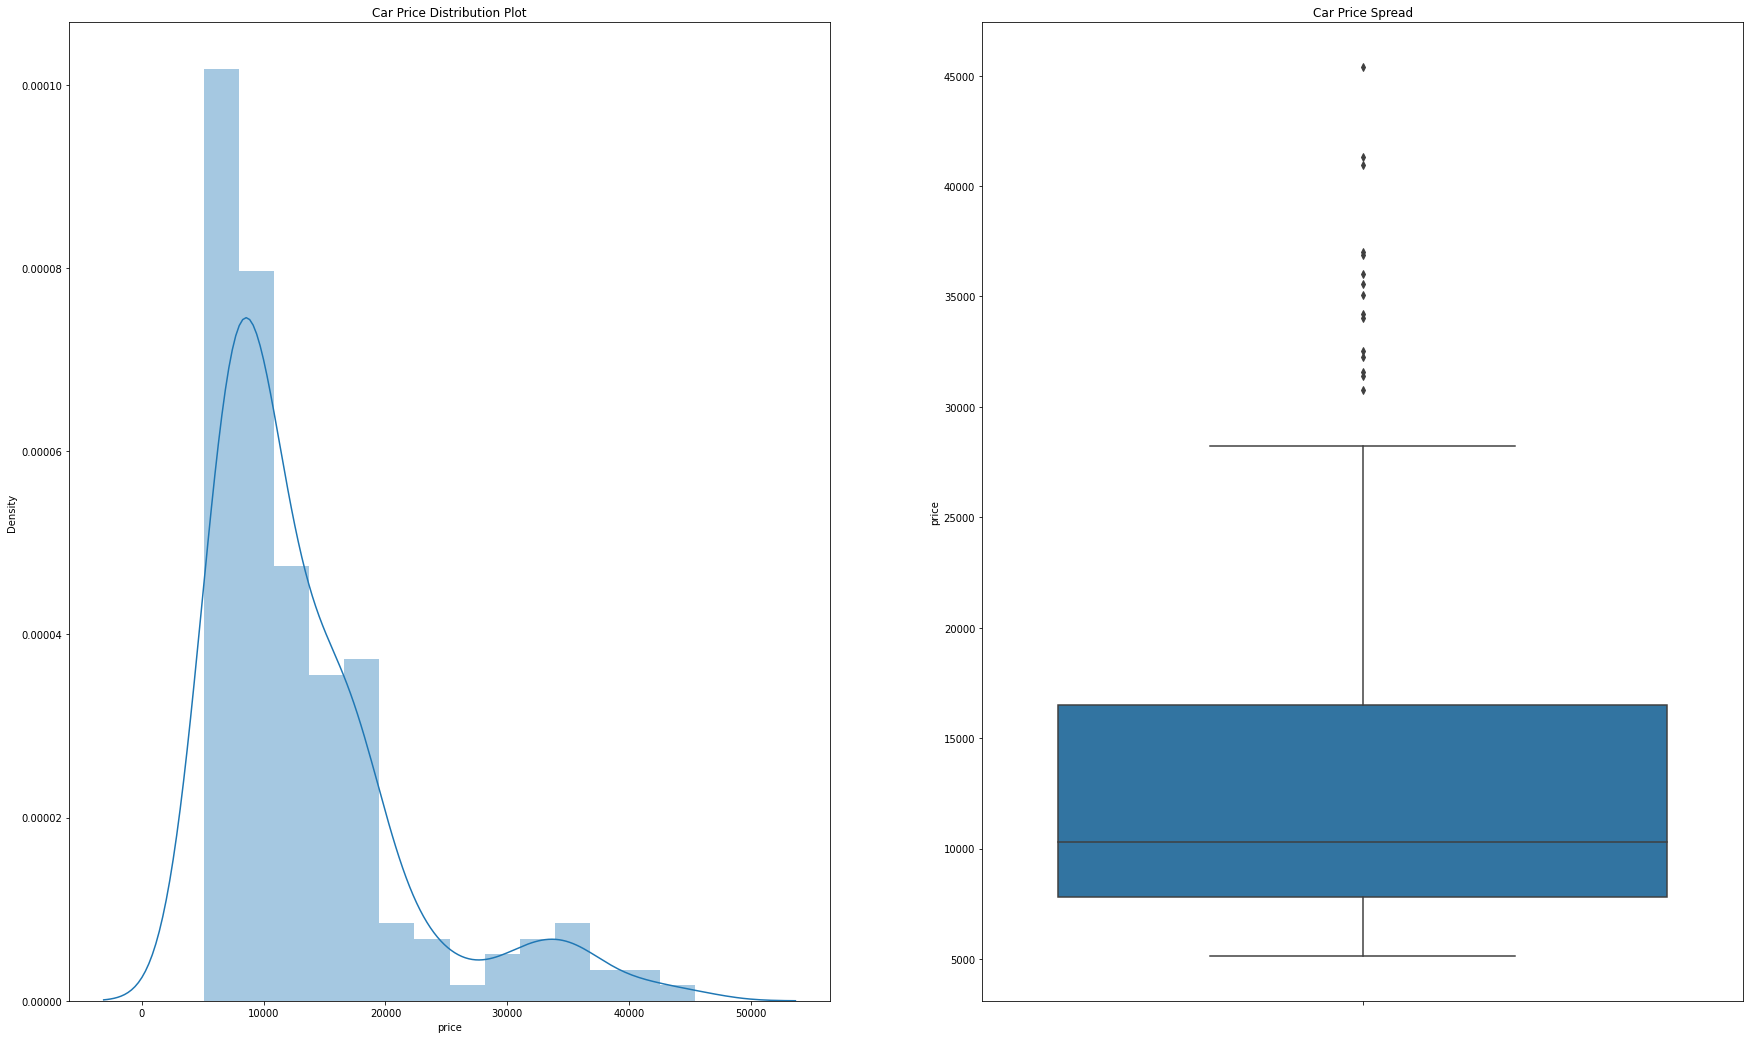

In [ ]:
#distribution plot\
#have to learn more 
plt.figure(figsize=(30,18))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

In [ ]:
#analysing all the car prices
#like count, mean, max, min
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


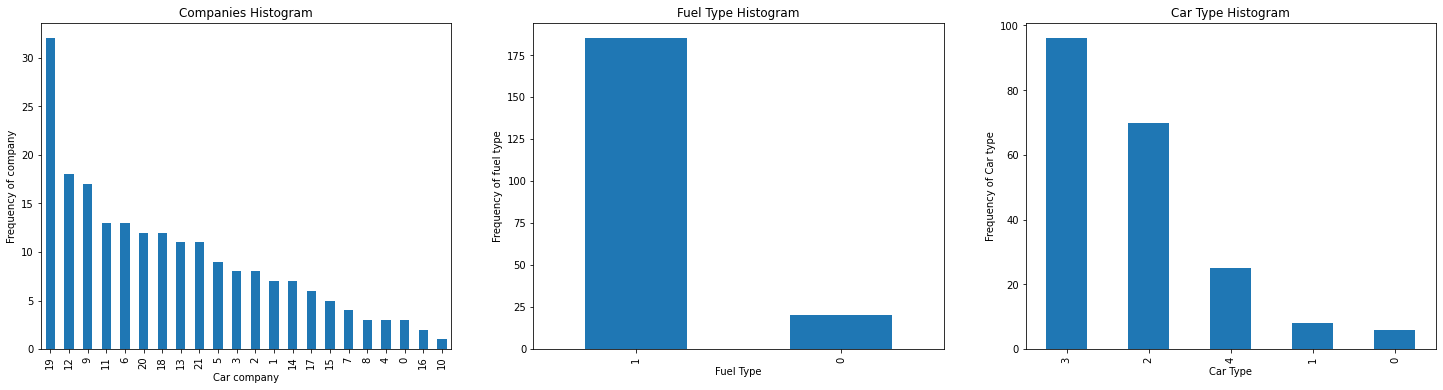

In [ ]:
#histogram-numerical representation
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = cars.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = cars.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

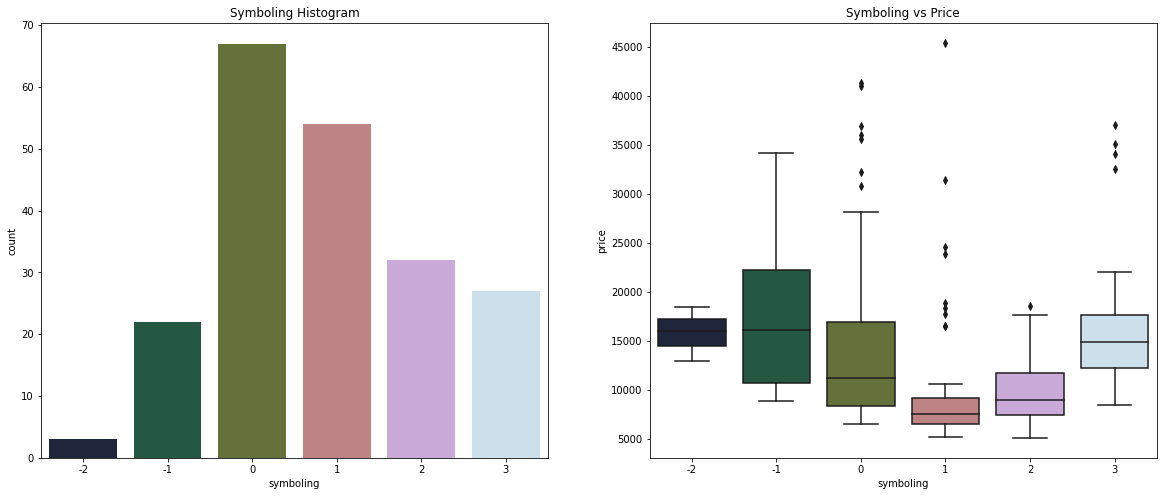

In [ ]:
#symboling corresponds to the insurance risk level of a car.
#histogram and spread
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(cars.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price, palette=("cubehelix"))

plt.show()

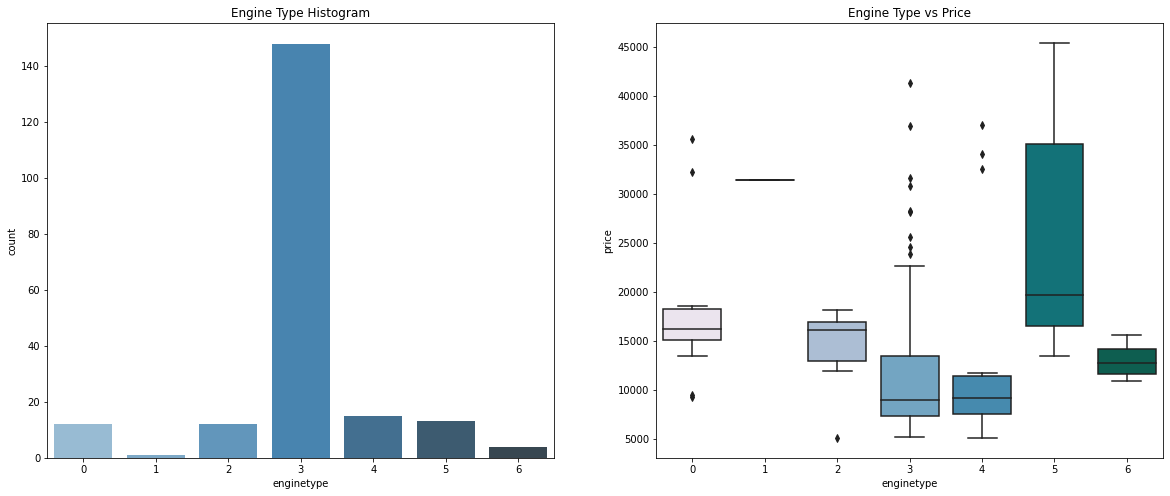

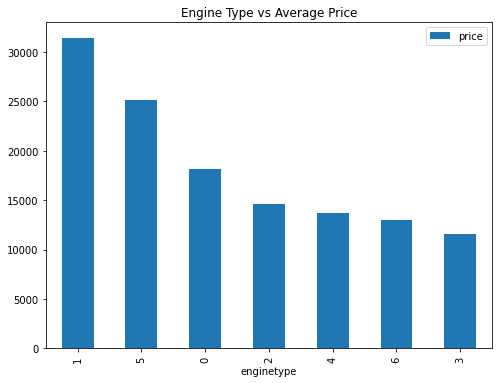

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(cars.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()


<Figure size 1800x432 with 0 Axes>

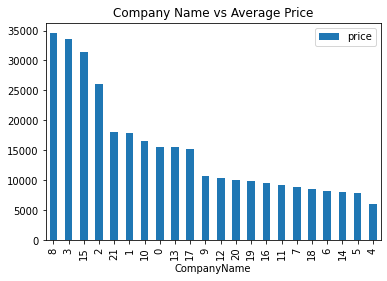

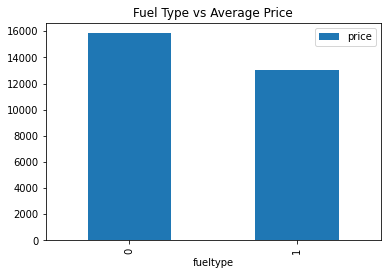

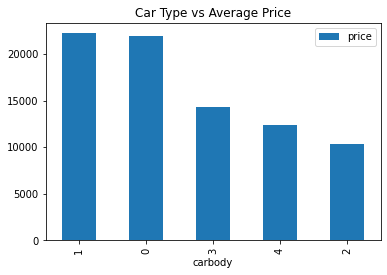

In [ ]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

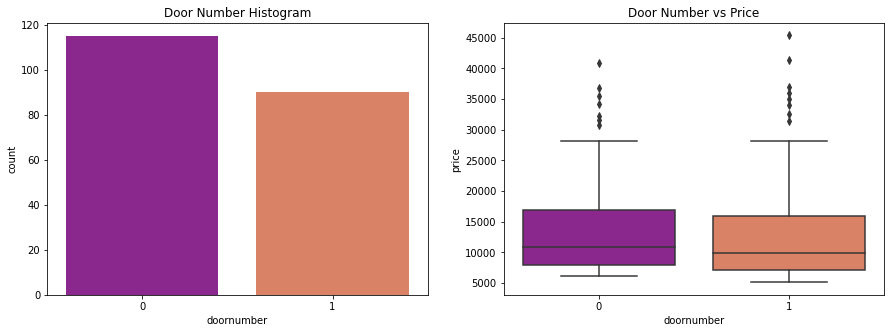

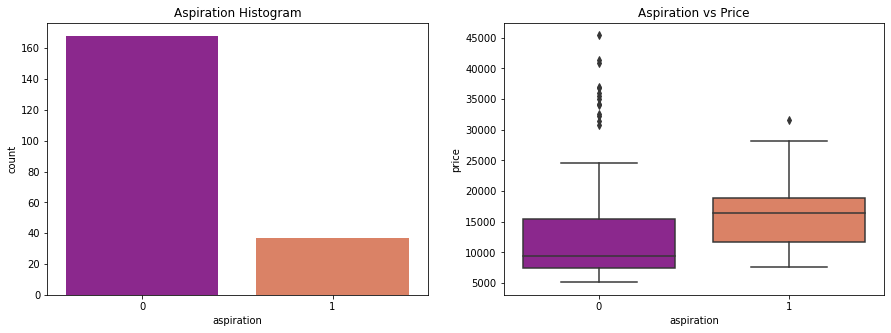

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(cars.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=cars.doornumber, y=cars.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(cars.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=cars.aspiration, y=cars.price, palette=("plasma"))

plt.show()

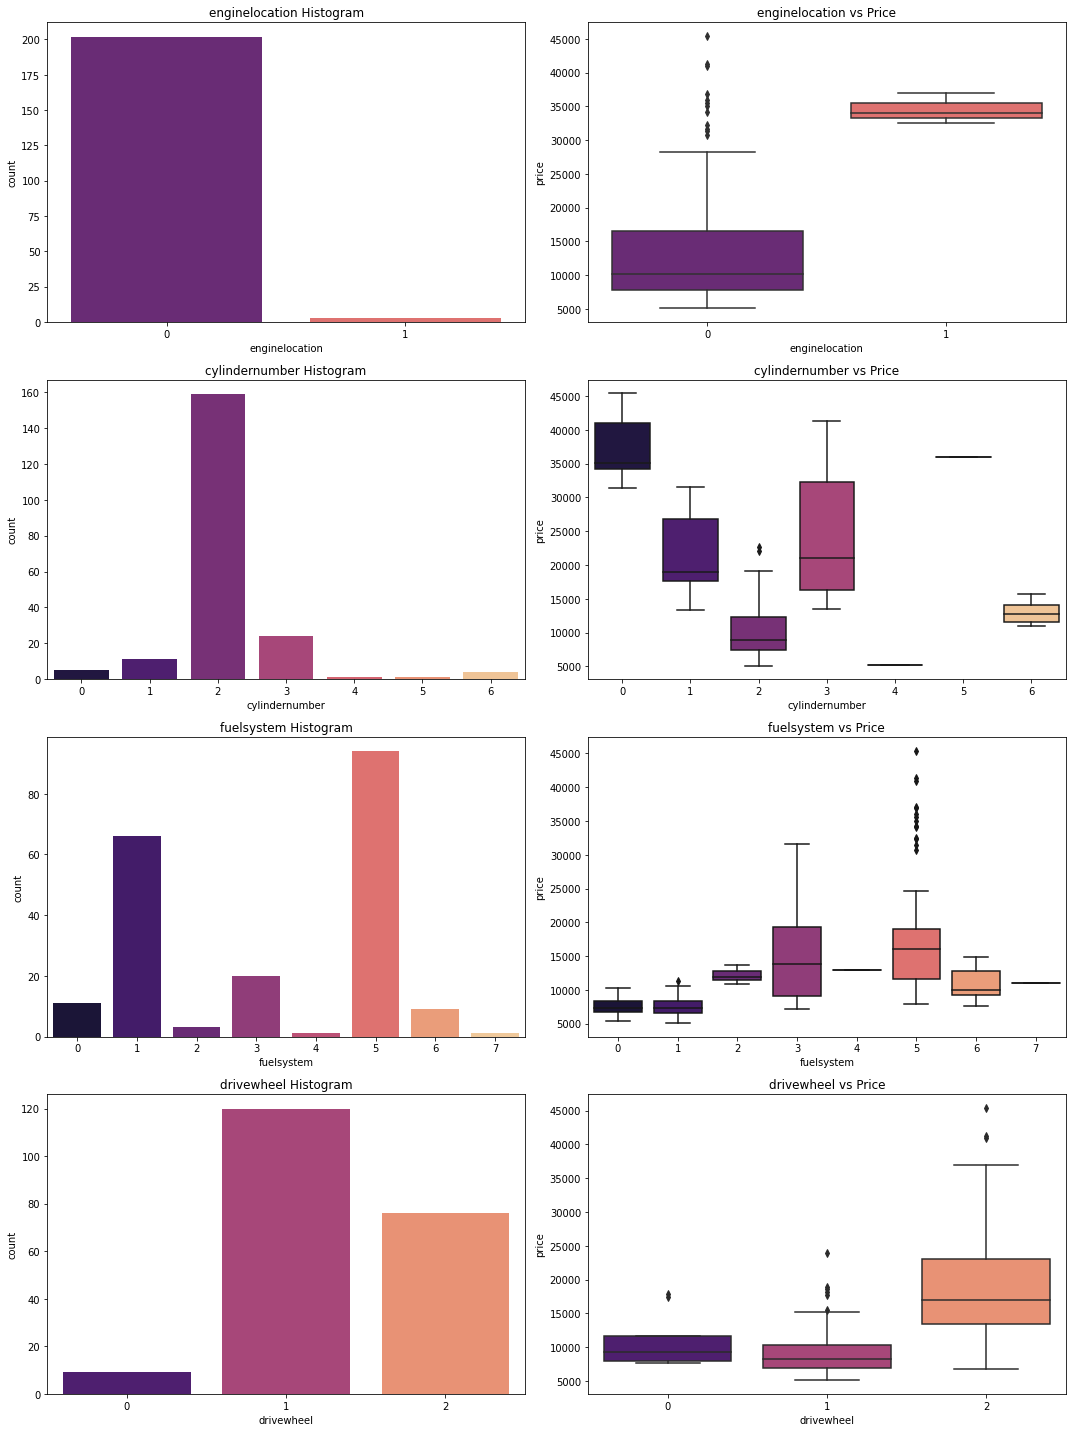

In [ ]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(cars[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()


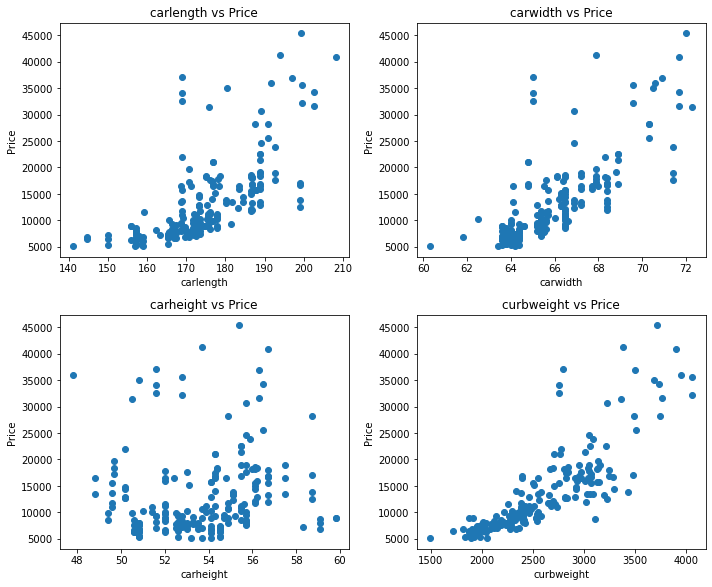

In [ ]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

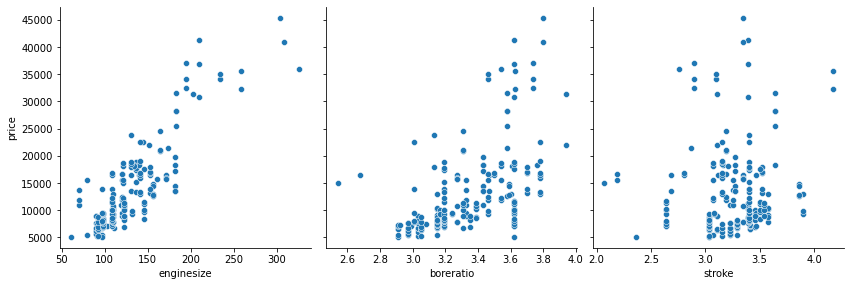

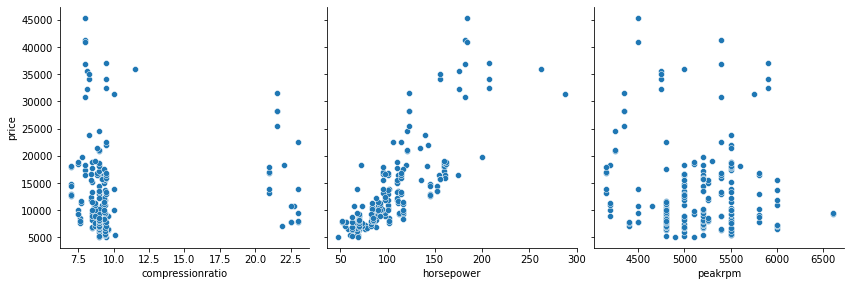

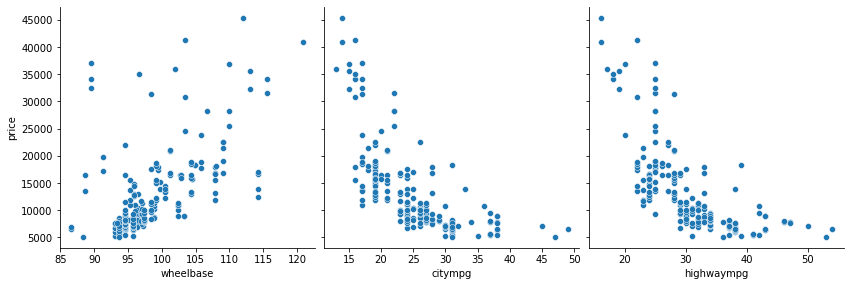

In [ ]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

In [ ]:
#defining the model
model1 = cars[['highwaympg']]
model2 = cars[['citympg']]
model3 = cars[['horsepower']]
model4 = cars[['enginesize']]
model5 = cars[['wheelbase']]
model6 = cars[['boreratio']]
model7 = cars[['enginesize','boreratio']]
model8 = cars[['enginesize','horsepower']]
model9 = cars[['wheelbase','horsepower','enginesize']]
model10 = cars[['boreratio','horsepower','enginesize']]
model11 = cars[['boreratio','horsepower','enginesize','wheelbase']]
#The output that the user get input from our dataset
actual_price = cars['price']

# REGRESSION MODELS

In [ ]:
#importing libraries for the model
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression

## Prediction using highwaympg

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(model1,actual_price,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy: "+str(r2_score*100))

The predicted values by this model is:
[10638.16701235 24530.06133791 19127.65798908 12181.7108263
 13725.25464025 12953.48273328  7551.07938445  7551.07938445
 19899.42989605 18355.8860821   8322.85129143]
MSE: 8670.001912036572
Accuracy: 48.09679008820164


## Prediction using citympg

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(model2,actual_price,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy: "+str(r2_score*100))

The predicted values by this model is:
[11734.92618908 22175.03540292 20568.86475464 13341.09683736
 14947.26748565 13341.09683736  8522.58489252  6916.41424423
 20568.86475464 18159.60878221  8522.58489252]
MSE: 9208.007813681877
Accuracy: 41.45535335870263


## Prediction using horsepower

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(model3,actual_price,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy: "+str(r2_score*100))

The predicted values by this model is:
[12014.45095302 25636.4747883  17964.30044429 10605.27607351
 14989.37569866 10605.27607351  7473.77634126  7473.77634126
 25323.32481508 11701.30097979  7630.35132787]
MSE: 7443.064297724783
Accuracy: 61.74753978061042


## Prediction using enginesize

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(model4,actual_price,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy: "+str(r2_score*100))

The predicted values by this model is:
[11992.72061451 43483.43893767  5292.56777979 12327.72825624
 10317.68240583 10150.17858496  6967.60598847  8140.13273455
 26900.56067175 11992.72061451  8140.13273455]
MSE: 6144.821980004657
Accuracy: 73.9279943295746


## Prediction using wheelbase

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(model5,actual_price,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy: "+str(r2_score*100))

The predicted values by this model is:
[12056.54837176 29342.8676904  10670.72530402 11400.10586599
 11400.10586599 14390.56617006  9503.71640487 14390.56617006
 16651.64591216 24456.01792522 10087.22085445]
MSE: 8913.165800009598
Accuracy: 45.14454758787443


## Prediction using boreratio

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(model6,actual_price,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy: "+str(r2_score*100))

The predicted values by this model is:
[13076.97444037 20255.34452539 13076.97444037 13382.43699718
 10633.2739859  10938.7365427   7578.6484178   8189.57353142
 17506.18151411 15062.48105963 10327.81142909]
MSE: 9998.047760401667
Accuracy: 30.97820573982223


## Prediction using enginesize and boreratio

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(model7,actual_price,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy: "+str(r2_score*100))

The predicted values by this model is:
[12037.54811929 43048.14336905  5621.89204293 12394.7995057
 10141.88543948 10017.96262016  6569.3715754   7765.04855394
 26841.17733675 12274.59390612  8020.32863207]
MSE: 6116.264033693828
Accuracy: 74.16976952480022


## Prediction using enginesize and horsepower

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(model8,actual_price,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy: "+str(r2_score*100))

The predicted values by this model is:
[11906.63091271 39870.57781183  9030.63841086 11664.24020197
 11704.36633519 10057.78902654  6622.03874613  7487.05091751
 27528.04823501 11797.84490261  7541.44392256]
MSE: 5518.06040643905
Accuracy: 78.97535209113225


## Prediction using stroke, horsepower, enginesize

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(model9,actual_price,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy: "+str(r2_score*100))

The predicted values by this model is:
[11694.04652353 40922.54114056  9810.09573196 11112.81598546
 11744.04526778 10730.92000348  6114.95242019  8261.82488638
 27288.74299418 15269.64348334  7040.6393813 ]
MSE: 5153.279421675414
Accuracy: 81.66321412175945


## Prediction using boreratio, horsepower and enginesize

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(model10,actual_price,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy: "+str(r2_score*100))

The predicted values by this model is:
[11927.77265716 39786.02500286  9067.33779351 11710.38408349
 11592.98393914 10004.83164217  6464.35741157  7347.42723197
 27486.10651863 11921.38035461  7507.43451977]
MSE: 5533.918595541578
Accuracy: 78.85433422964914


## Prediction using boreratio, horsepower, enginesize and stroke

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(model11,actual_price,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy: "+str(r2_score*100))

The predicted values by this model is:
[11664.23992307 41050.9784228   9810.89784196 11043.75993545
 11851.6540931  10812.01573246  6241.52262586  8429.88837722
 27317.63201988 15311.14079607  7050.03057583]
MSE: 5122.63795465136
Accuracy: 81.88062736199548
